In [1]:
import pandas as pd
import datetime

from matplotlib import pyplot as plt

import seaborn as sns

%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['04fe55a1-a849-4a9b-af39-68051cad4502.xls']))

Saving 04fe55a1-a849-4a9b-af39-68051cad4502.xls to 04fe55a1-a849-4a9b-af39-68051cad4502.xls


In [ ]:
df=df.drop(['purchase_id','purchase_dt','purchase_amt'], axis = 1)

In [ ]:
df['birth_dt'] = pd.to_datetime(df['birth_dt'], format="%m/%d/%y")
df.reg_dttm.dt.hour.head()

0    12
1    14
2    19
3    18
4    12
Name: reg_dttm, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   client_id  2377 non-null   int64         
 1   birth_dt   2377 non-null   datetime64[ns]
 2   reg_dttm   2377 non-null   datetime64[ns]
 3   year       2377 non-null   int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 74.4 KB


In [ ]:
df.head()

,client_id,birth_dt,reg_dttm,year
0,820519,1990-05-10,2019-01-02 12:49:39,1990
1,820521,1970-03-23,2019-01-02 14:14:39,1970
2,820523,1991-04-01,2019-01-02 19:51:19,1991
3,820526,1985-04-27,2019-01-02 18:09:39,1985
4,820544,1991-05-03,2019-01-03 12:24:42,1991


In [ ]:
d1 = df.groupby(df['reg_dttm'].dt.date)[['year']].median().reset_index()
d1.head(100)

,reg_dttm,year
0,2019-01-02,1987.5
1,2019-01-03,1995.0
2,2019-01-04,1984.0
3,2019-01-05,1970.0
4,2019-01-06,1998.0
...,...,...
83,2019-04-01,1997.0
84,2019-04-02,1995.0
85,2019-04-03,2000.0
86,2019-04-04,1995.0


In [ ]:
#d = df.groupby(pd.Grouper(key="reg_dttm", freq="D")).mean()
#d.head()

,client_id,year
reg_dttm,,
2019-01-02,820522.250000,1984.0
2019-01-03,820548.000000,1995.0
2019-01-04,820570.333333,1986.0
2019-01-05,820602.400000,1974.0
2019-01-06,820636.833333,1991.0


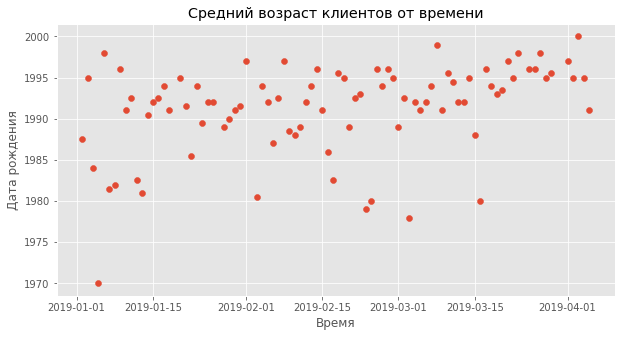

In [ ]:
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10, 5)

plt.scatter(d1['reg_dttm'],d1['year']);

plt.title('Средний возраст клиентов от времени');

plt.ylabel('Дата рождения');

plt.xlabel('Время');

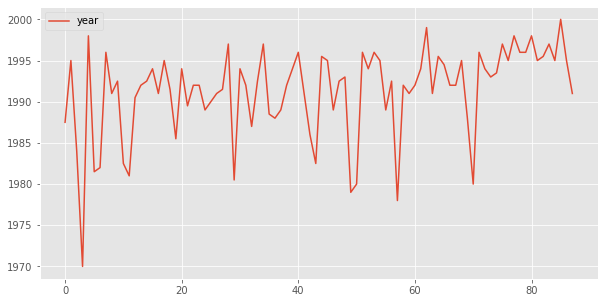

In [ ]:
d1.plot()